# Final Project - Stage 1
## Exploratory Data Analysis - Data Set E-Commerce Shipping
## Group 8 : Decentraland
**Group Member:**
- Dharma Setiawan
- Ilham Ibnu A.
- M. Farhan Atmawinanda
- Fikri Diva S.
- Ahmad Ilham H.

### Import Libraries

In [ ]:
#Data and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import kendalltau
import plotly.express as px

## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Import Data set

Link dataset = https://www.kaggle.com/prachi13/customer-analytics

**Penjelasan variabel-variabel pada dataset**

**1. ID**: ID Number of Customers.

**2. Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

**3. Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.

**4. Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.

**5. Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

**6. Cost of the product**: Cost of the Product in US Dollars.

**7. Prior purchases**: The Number of Prior Purchase.

**8. Product importance**: The company has categorized the product in the various parameter such as low, medium, high.

**9. Gender**: Male and Female.

**10. Discount offered**: Discount offered on that specific product.

**11. Weight in gms**: It is the weight in grams.

**12. Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [ ]:
url_dataset = "https://raw.githubusercontent.com/Decentraland-Team-Final-Project/Report-Final-Project-/main/Dataset/E-Commerce%20Shipping%20Data.csv"
df_shipping = pd.read_csv(url_dataset)
df_shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Descriptive Statistics

## Informasi general variabel-variabel pada data frame

In [ ]:
#Info semua variabel secara general
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
#Cek missing value
df_shipping.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
#Cek data double
df_shipping.duplicated().sum()

0

- Data terdiri dari 10.999 sampel (baris).
- Tidak ada null value di semua kolom.
- Tidak ada baris yang terduplikasi.
- Terdapat 10 fitur (variabel independen) dan 1 targeted variable (variabel dependen).
- Berdasarkan jenisnya, fitur terdiri dari 4 fitur kategorik (`Warehouse_block`, `Mode_of_Shipment`, `Product_importance`, dan `Gender`) dan 6 fitur numerik (`Customer_care_calls`, `Customer_rating`, `Cost_of_the_Product`, `Prior_purchases`, `Discount_offered`, dan `Weight_in_gms`).
- Satu target variabel yaitu `Reached.on.Time_Y.N` yang bertipe numerik.

## Statistical Summary

In [ ]:
#Pengelompokkan variabel kategorik
df_shipping_cat = df_shipping[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']]
df_shipping_cat.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


In [ ]:
#Pengelompokkan variabel numerik
df_shipping_num = df_shipping[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']]
df_shipping_num.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


### Variabel Kategorik

In [ ]:
#Rangkuman statistik variabel kategorik 
df_shipping_cat.describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


- Semua variabel memiliki kardinalitas (jumlah unique values) yang rendah, sudah bagus.
- `Warehouse_block` yang paling banyak digunakan adalah gudang F (lebih dari 30%).
- Pengiriman barang didominasi moda pengiriman melalui kapal (lebih dari 65%).
- Sampel didominasi oleh kategori `Product_importance` jenis "low".
- Pada data frame ini, sampel wanita sedikit lebih banyak daripada sampel pria. Kendati demikian, perbandingannya hampir berimbang, mendekati 50%-50%.

### Variabel Numerik

In [ ]:
#Rangkuman statistik variabel numerik 
df_shipping_num.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


- Variabel `Customer_care_calls` dan `Cost_of_the_Product` sudah cukup simetrik distribusinya mendekati distribusi normal (mean dan median tidak berbeda jauh).
- Variabel `Discount_offered` pola persebarannya membentuk positively skewed (mean>median), sedangkan variabel `Weight_in_gms` membentuk negatively skewed (median>mean).
- Dilihat dari nilai min, max, median, dan mean, variabel `Prior_purchases` dan `Discount_offered` tampaknya memiliki nilai outlier di titik max.
- Disini terlihat bahwa variabel `Customer_rating` bisa juga dikategorikan sebagai variabel kategorikal, 1-5 merupakan kategori rating. Untuk analisis statistik deskriptif, lebih pas untuk melihat variabel `Customer_rating` ini sebagai variabel kategorik.

In [ ]:
#Melihat perbandingan data pada variabel `Customer_rating`
df_shipping.groupby(['Customer_rating']).agg({'ID' : ['count']})

,ID
,count
Customer_rating,
1,2235
2,2165
3,2239
4,2189
5,2171


- Setiap tingkat rating memiliki jumlah data yang hampir sama, distribusi berimbang.

### Target Variable

In [ ]:
#Rangkuman statistik targeted variabel (`Reached.on.Time_Y.N`)
df_shipping['Reached.on.Time_Y.N'].describe()

count    10999.000000
mean         0.596691
std          0.490584
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Reached.on.Time_Y.N, dtype: float64

- Variabel ini adalah variabel boolean/binary bertipe integer, bisa juga dijadikan variabel kategorikal, 1 adalah pengantaran barang terlambat dan 0 adalah pengantaran barang tepat waktu. Untuk analisis statistik deskriptif, lebih pas untuk melihat variabel `Reached.on.Time_Y.N` ini sebagai variabel kategorik.

In [ ]:
#Melihat perbandingan data pada variabel `Reached.on.Time_Y.N`
df_shipping.groupby(['Reached.on.Time_Y.N']).agg({'ID' : ['count']})

,ID
,count
Reached.on.Time_Y.N,
0,4436
1,6563


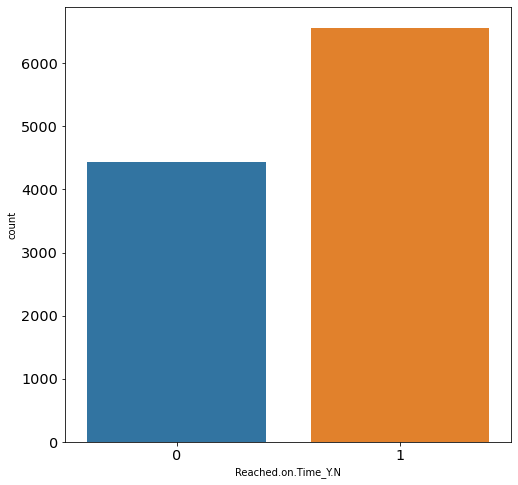

In [ ]:
# Countplot target variable visualization
plt.figure(figsize=(8, 8))
sns.countplot(x=df_shipping['Reached.on.Time_Y.N'], data=df_shipping)

- Sampel sedikit tidak berimbang, hampir 60% data sampel termasuk ke dalam kategori pengiriman barang yang terlambat.

## Rangkuman Descriptive Statistics
A. Apakah ada kolom dengan tipe data kurang sesuai?
> Variabel `Customer_rating` dan `Reached.on.Time_Y.N` bertipe numerik bisa digunakan untuk analisis multivariat dan korelasi, namun bisa juga dikategorikan sebagai variabel kategorik untuk keperluan analisis statistik deskriptif dan univariat.

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
> Tidak ada kolom yang memiliki nilai null.

C. Apakah ada kolom yang isi nilainya tidak sesuai?
> Semua kolom tampak sudah terisi dengan nilai yang sesuai dengan tipe data.

D. Apakah ada kolom yang memiliki nilai summary agak aneh?
> - Variabel `Discount_offered` pola persebarannya membentuk positively skewed (mean>median), sedangkan variabel `Weight_in_gms` membentuk negatively skewed (median>mean).
> - Dilihat dari nilai min, max, median, dan mean, variabel `Prior_purchases` dan `Discount_offered` tampaknya memiliki nilai outlier di titik max.
> - Sampel sedikit tidak berimbang, hampir 60% data sampel termasuk ke dalam kategori pengiriman barang yang terlambat.

In [ ]:
#Menambah kolom `Customer_rating` dan `Reached.on.Time_Y.N` bertipe kategorikal
df_shipping['Customer_Rating(cat)'] = np.where(df_shipping['Customer_rating']==1, 'Bintang 1',
                                          np.where(df_shipping['Customer_rating']==2, 'Bintang 2',
                                                   np.where(df_shipping['Customer_rating']==3, 'Bintang 3',
                                                            np.where(df_shipping['Customer_rating']==4, 'Bintang 4', 'Bintang 5'))))

In [ ]:
df_shipping['Late_Shipment(cat)'] = np.where(df_shipping['Reached.on.Time_Y.N']==0, 'No', 'Yes')

In [ ]:
#Rename variabel lama (agar rapih dan seragam)
df_shipping = df_shipping.rename(columns = { 'Warehouse_block' : 'Warehouse_Block',
                                             'Customer_care_calls' : 'Customer_Care_Calls',
                                             'Customer_rating' : 'Customer_Rating(num)',
                                             'Cost_of_the_Product' : 'Cost_of_The_Product',
                                             'Prior_purchases' : 'Prior_Purchases',
                                             'Product_importance' : 'Product_Importance',
                                             'Discount_offered' : 'Discount_Offered',
                                             'Reached.on.Time_Y.N' : 'Late_Shipment(num)'})

In [ ]:
#Tampilan terbaru penamaan variabel
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10999 non-null  int64 
 1   Warehouse_Block       10999 non-null  object
 2   Mode_of_Shipment      10999 non-null  object
 3   Customer_Care_Calls   10999 non-null  int64 
 4   Customer_Rating(num)  10999 non-null  int64 
 5   Cost_of_The_Product   10999 non-null  int64 
 6   Prior_Purchases       10999 non-null  int64 
 7   Product_Importance    10999 non-null  object
 8   Gender                10999 non-null  object
 9   Discount_Offered      10999 non-null  int64 
 10  Weight_in_gms         10999 non-null  int64 
 11  Late_Shipment(num)    10999 non-null  int64 
 12  Customer_Rating(cat)  10999 non-null  object
 13  Late_Shipment(cat)    10999 non-null  object
dtypes: int64(8), object(6)
memory usage: 1.2+ MB


In [ ]:
df_shipping.head(5)

,ID,Warehouse_Block,Mode_of_Shipment,Customer_Care_Calls,Customer_Rating(num),Cost_of_The_Product,Prior_Purchases,Product_Importance,Gender,Discount_Offered,Weight_in_gms,Late_Shipment(num),Customer_Rating(cat),Late_Shipment(cat)
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Bintang 2,Yes
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Bintang 5,Yes
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,Bintang 2,Yes
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,Bintang 3,Yes
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,Bintang 2,Yes


| Variable | Type | Definition | Example |
| ----------- | ----------- | ----------- | ----------- |
| ID | Nominal | Customer ID Number | 10, 15, 10995, 10996
| Warehouse_Block | Nominal | Warehouse to Store the Product | A, B, C, D, F
| Mode_of_Shipment | Nominal | Mode of Product Shipping | Flight, Road, Ship
| Customer_Care_Calls | Discrete | Number of Calls Made | 2, 5, 6
| Customer_Rating(num) | Discrete | Company Rating by Customers | 5: Best - 4: Better - 3: Neutral - 2: Bad - 1: Worst
| Cost_of_The_Product | Discrete | Cost of Product in US Dollars | 177, 216, 236, 182
| Prior_Purchases | Discrete | Number of Prior Purchase | 3, 2, 6
| Product_Importance | Ordinal | Product Importance Parameter | Low, Medium, High
| Gender | Nominal | Customer Gender | Male, Female
| Discount_Offered | Discrete | Product Discount in US Dollars | 65, 10, 16
| Weight_in_gms | Continous | Product Weight in grams | 4953, 5676, 2171
| Late_Shipment(num) | Boolean | Target Variable, 1: NOT reached on time - 0: REACHED on time | 1, 0
| Customer_Rating(cat) | Ordinal | Company Rating by Customers | Bintang 5 - Bintang 4 - Bintang 3 - Bintang 2 - Bintang 1
| Late_Shipment(cat) | Nominal | Target Variable, 1: NOT reached on time - 0: REACHED on time | Yes, No

# Univariate Analysis

In [ ]:
#Pengelompokan kolom berdasarkan jenisnya
number = ['Customer_Care_Calls', 'Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms']
category = ['Warehouse_Block', 'Mode_of_Shipment', 'Product_Importance', 'Gender', 'Customer_Rating(cat)', 'Late_Shipment(cat)']

## Analisis Boxplot - Distribusi Data pada Variabel-variabel Numerik

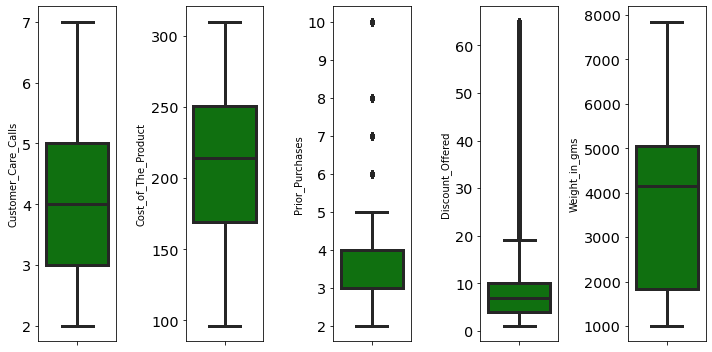

In [ ]:
features = number
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_shipping[features[i]], color='green', orient='v')
  plt.tight_layout()

- Outlier terlihat pada variabel `Prior_Purchases` dan `Discount_Offered`
- Variabel `Prior_Purchases` dan `Discount_Offered` membentuk pola positively skewed.
- Variabel `Weight_in_gms` membentuk pola negatively skewed.
- Variabel `Customer_Care_Calls` dan `Cost_of_The_Product` hampir mendekati distribusi normal walaupun polanya masih sedikit skewed.

## Analisis Distplot - Distribusi Data pada Variabel-variabel Numerik

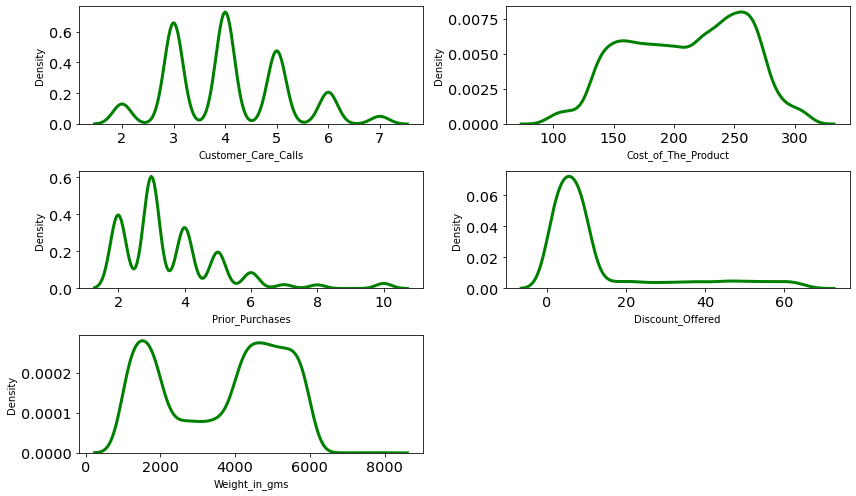

In [ ]:
features = number
plt.figure(figsize=(12, 7))
for i in range(0, len(features)):
  plt.subplot(3, len(features)/2, i+1)
  sns.kdeplot(x=df_shipping[features[i]], color='green')
  plt.xlabel(features[i])
  plt.tight_layout()

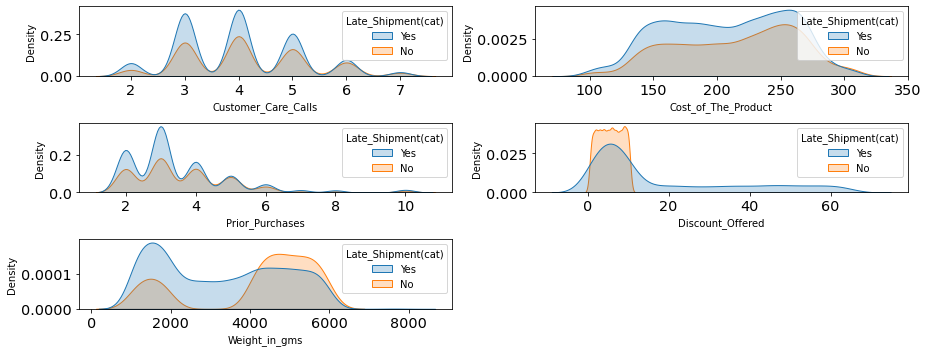

In [ ]:
# KDEplot with Target Hue
numsplot = ['Customer_Care_Calls', 'Cost_of_The_Product','Prior_Purchases', 'Discount_Offered', 'Weight_in_gms']
plt.figure(figsize=(13, 5))
for i in range(0, len(numsplot)):
    plt.subplot(3, len(numsplot)/2, i+1)
    sns.kdeplot(data=df_shipping, x=df_shipping[numsplot[i]], hue='Late_Shipment(cat)', fill='True')
    plt.tight_layout()

- Sesuai dugaan analisis boxplot, variabel `Prior_Purchases` dan `Discount_Offered` membentuk pola positively skewed. Pada variabel `Prior_Purchases`, polanya naik turun.
- Dari analisis perbandingan mean-median dan boxplot, diduga variabel `Customer_Care_Calls` dan `Cost_of_The_Product` mendekati distribusi normal, ternyata disini polanya terlihat masih naik turun.

## Analisis Violinplot - Distribusi Data pada Variabel-variabel Numerik

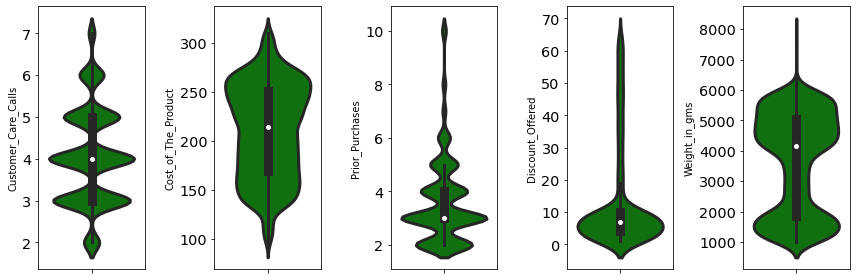

In [ ]:
for i in range(0, len(number)):
    plt.subplot(1, len(number), i+1)
    sns.violinplot(y=df_shipping[number[i]], color='green', orient='v')
    plt.tight_layout()

Kombinasi analisis boxplot dan distplot, disini hasil pengamatan pada dua analisis plot sebelumnya juga dapat terlihat.
- Variabel `Prior_Purchases` dan `Discount_Offered` membentuk pola positively skewed. Pada variabel `Prior_Purchases`, polanya naik turun.
- Variabel `Customer_Care_Calls` dan `Cost_of_The_Product` mengarah ke distribusi normal, kendati demikian polanya terlihat masih naik turun.
- Variabel `Weight_in_gms` mengarah ke pola negatively skewed, kendati demikian polanya terlihat masih naik turun.

## Analisis Countplot - Distribusi Data pada Variabel-variabel Kategorikal

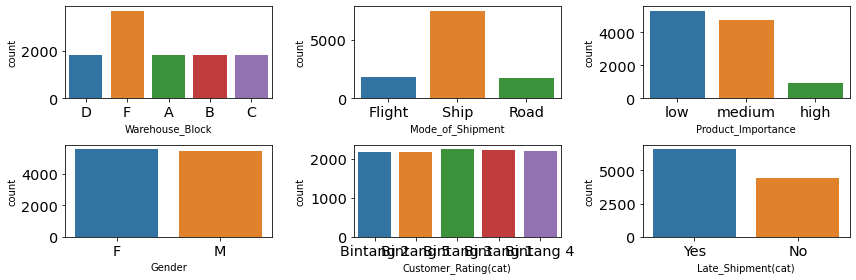

In [ ]:
for i in range(0, len(category)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_shipping[category[i]], orient='v')
    plt.tight_layout()

- Semua variabel memiliki kardinalitas (jumlah unique values) yang rendah, sudah bagus.
- `Warehouse_Block` yang paling banyak digunakan adalah gudang F (lebih dari 30%), nilai lainnya jumlahnya hampir merata.
- Pada variabel `Warehouse_Block` tidak ada "Gudang E"?
- Pengiriman barang didominasi moda pengiriman melalui kapal (lebih dari 65%), nilai lainnya jumlahnya hampir merata.
- Sampel didominasi oleh kategori `Product_Importance` jenis "low", diikuti "medium", lalu "high" dengan jumlah yang telampau rendah bila dibandingkan dengan dua nilai lainnnya.
- Pada data frame ini, sampel wanita sedikit lebih banyak daripada sampel pria. Kendati demikian, perbandingannya hampir berimbang, mendekati 50%-50%.
- Persebaran data `Customer_Rating` terdistribusi secara merata.
- Sampel data memiliki lebih banyak transaksi pembelian yang pengirimannya terlambat(late).

# Multivariate Analysis

In [ ]:
#Buat data frame baru dimana variabel `ID` untuk sementara di drop
df_shippingcorr = df_shipping.drop(['ID'], axis=1)

## Correlation Heatmap

In [ ]:
df_shippingcorr.corr()

,Customer_Care_Calls,Customer_Rating(num),Cost_of_The_Product,Prior_Purchases,Discount_Offered,Weight_in_gms,Late_Shipment(num)
Customer_Care_Calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_Rating(num),0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_The_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_Purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_Offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Late_Shipment(num),-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


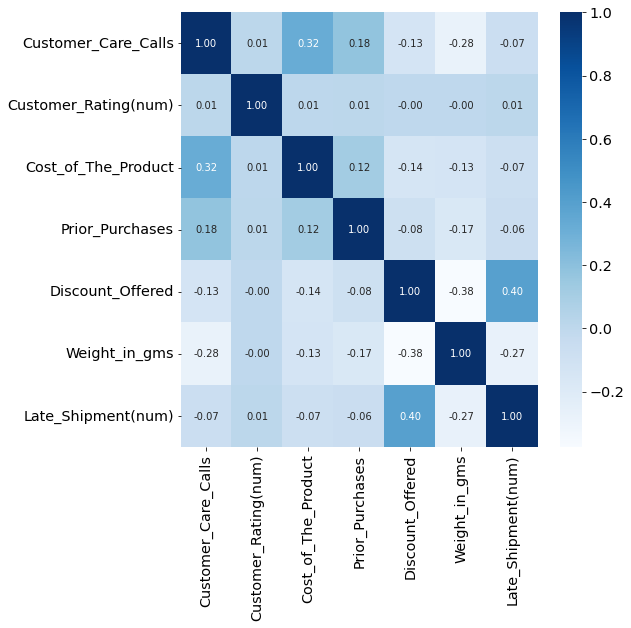

In [ ]:
# correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df_shippingcorr.corr(), cmap='Blues', annot=True, fmt='.2f')

- Variabel `Customer_care_calls`, `Cost_of_The_Product`, `Prior_Purchases`, dan `Weight_in_gms` memiliki korelasi negatif yang lemah terhadap target variabel (`Late_Shipment`).
- Variabel `Discount_Offered` dan `Customer_Rating` memiliki korelasi positif yang lemah terhadap target variabel (`Late_Shipment`).
- Variabel `Weight_in_gms` dan `Discount_offered` memiliki korelasi negatif lemah.
- Variabel `Cost_of_The_Product` dan `Customer_Care_Calls` memiliki korelasi positif lemah.
- Tidak ada features yang redundant karena tidak ada features yang memiliki korelasi > 0.7

## Pair Plot

<Figure size 1080x1080 with 0 Axes>

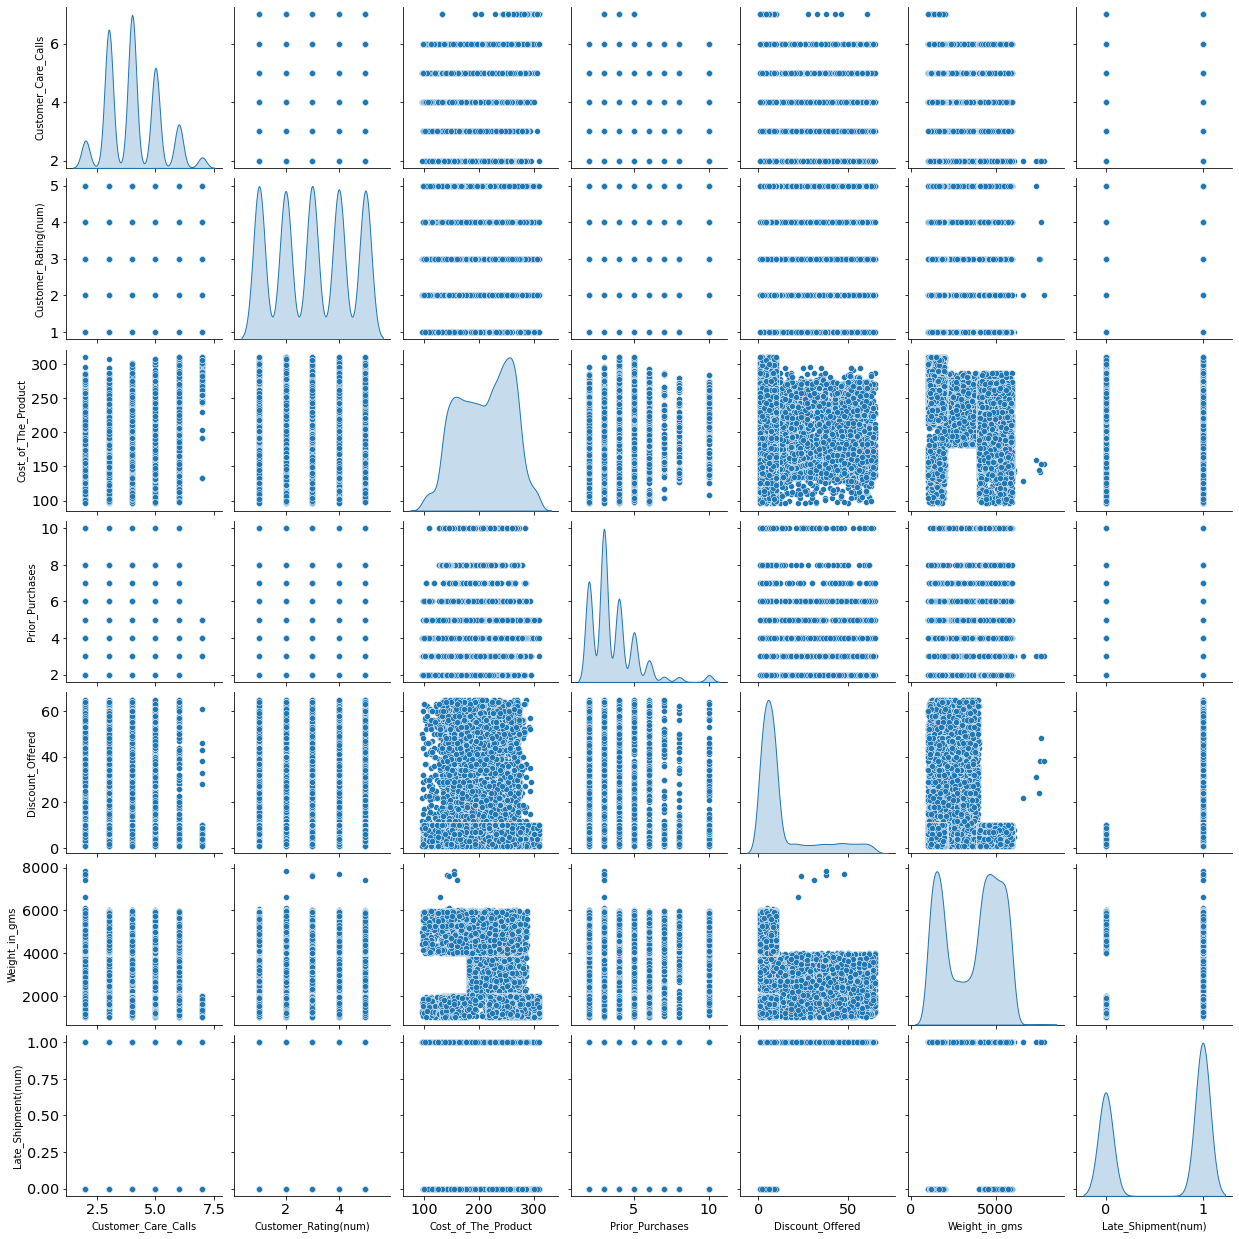

In [ ]:
# Pair Plot
plt.figure(figsize=(15, 15))
sns.pairplot(df_shippingcorr, diag_kind='kde')

<Figure size 1080x1080 with 0 Axes>

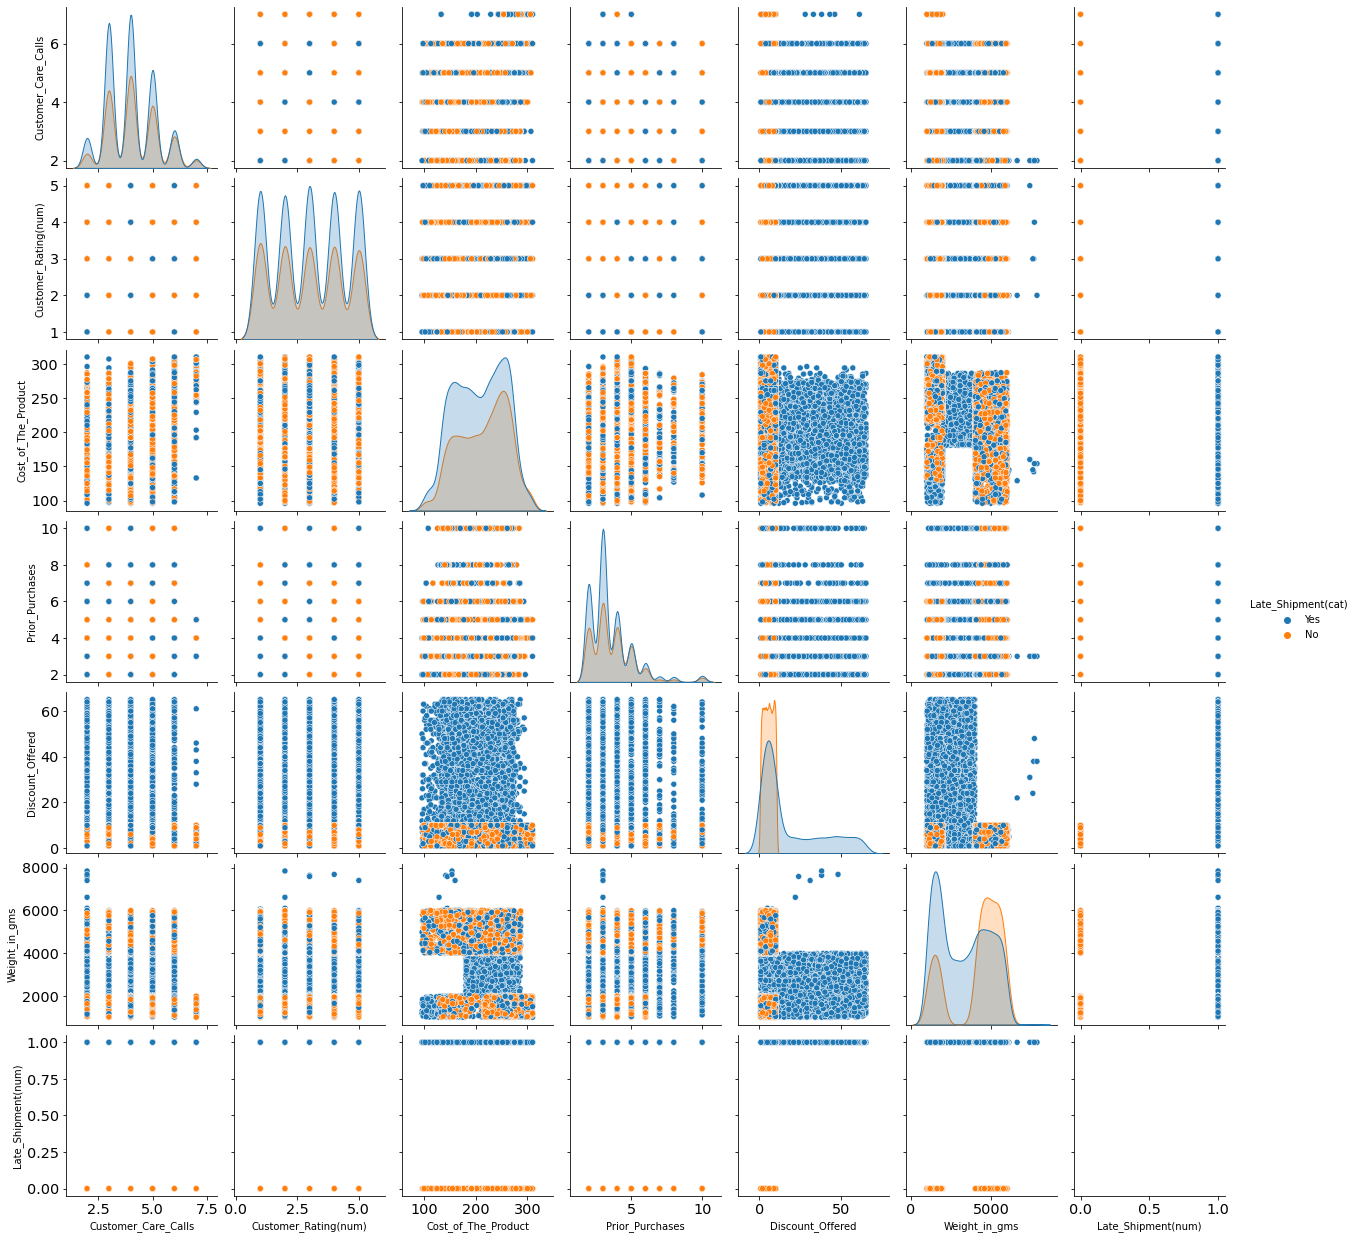

In [ ]:
# di sini kita juga hanya menggunakan sample dari full dataset
plt.figure(figsize=(15, 15))
sns.pairplot(df_shippingcorr, diag_kind='kde', hue='Late_Shipment(cat)')

Dari pair plot di atas, kita juga dapat melilhat hal yang mirip:

Late cenderung lebih tinggi untuk Weight 2-4 kg dan Discount >10%.

## Kendall

In [ ]:
corr = df_shippingcorr.corr(method='kendall')

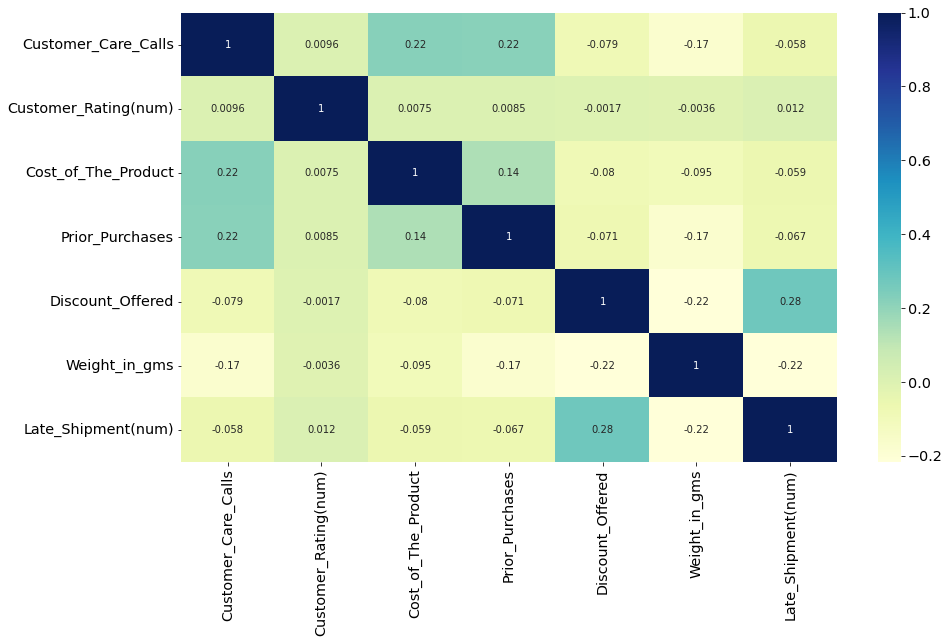

In [ ]:
rcParams['figure.figsize'] = 14.7,8.27
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

## Variabel Kategorik Vs Target Variable

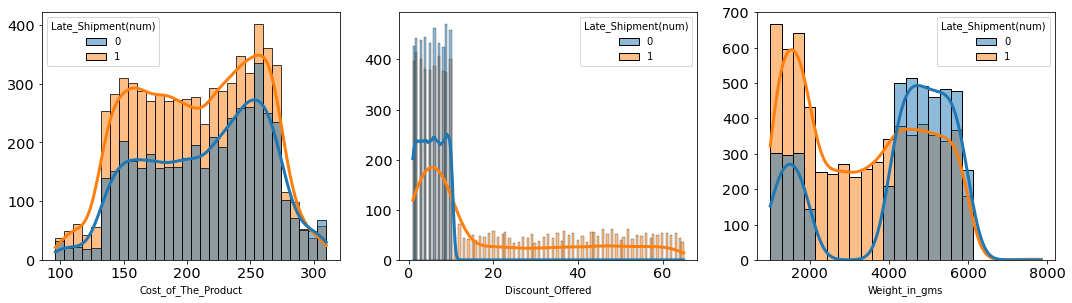

In [ ]:
# Histplot Visualization with Target Hue
flag = ['Cost_of_The_Product', 'Discount_Offered', 'Weight_in_gms']

plt.figure(figsize=(15, 12))
for i in range(0, len(flag)):
    plt.subplot(len(flag), 3, i+1)
    sns.histplot(data=df_shipping, x=df_shipping[flag[i]], hue=df_shipping['Late_Shipment(num)'], fill=True, kde='True')
    plt.tight_layout()
    plt.ylabel(None)

Pengamatan
* Discount yang lebih dari 10 persen terkonfirmasi terlambat. Hal ini bisa mengindikasikan beberapa bulan dimana promo diberikan besar-besaran sehingga pengiriman.
* Regarding Weight, barang yang berkisar 2-4 kg terkonfirmasi terlambat.
* Cost dari barang tidak mempengaruhi keterlambatan.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


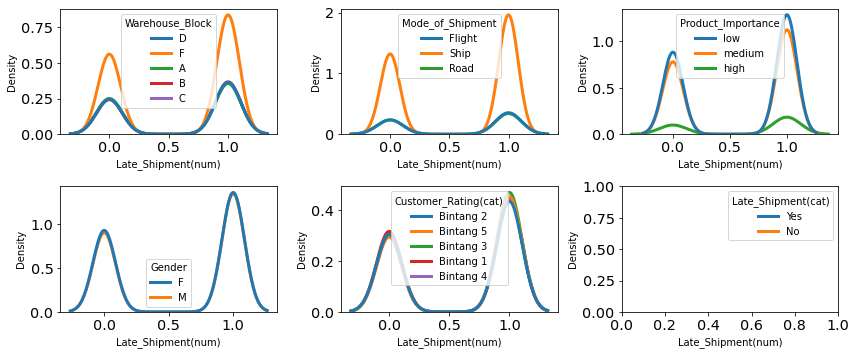

In [ ]:
features = category
plt.figure(figsize=(12, 7))
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1) 
    sns.kdeplot(data=df_shippingcorr, x='Late_Shipment(num)', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
# Calls Late Percentage
df_calls = df_shipping.groupby(['Customer_Care_Calls', 'Late_Shipment(num)']).agg({'ID' : 'count' }).reset_index()
df_calls.columns = ['Calls', 'Late', 'Count']
df_calls['Total'] = df_calls.groupby(['Calls'])['Count'].transform('sum')
df_calls['Percentage'] = round(df_calls['Count'] / df_calls['Total'] * 100, 2)
df_calls

,Calls,Late,Count,Total,Percentage
0,2,0,222,638,34.80
1,2,1,416,638,65.20
2,3,0,1206,3217,37.49
3,3,1,2011,3217,62.51
4,4,0,1431,3557,40.23
5,4,1,2126,3557,59.77
6,5,0,968,2328,41.58
7,5,1,1360,2328,58.42
8,6,0,490,1013,48.37
9,6,1,523,1013,51.63


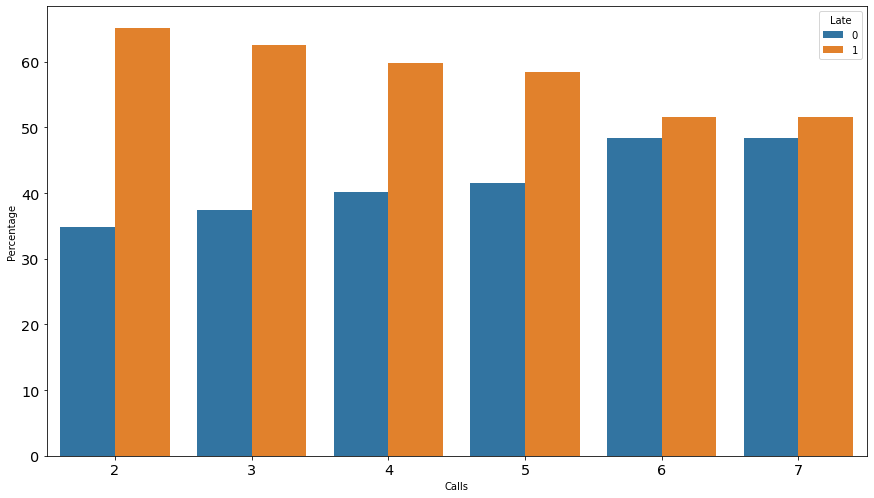

In [ ]:
sns.barplot(x='Calls', y ='Percentage', data = df_calls, hue='Late')

Semakin banyak call yang terjadi maka tingkat keterlambatan menurun.

In [ ]:
# Purchase Late Percentage 
df_purchase = df_shipping.groupby(['Prior_Purchases', 'Late_Shipment(num)']).agg({'ID' : 'count' }).reset_index()
df_purchase.columns = ['Purchase', 'Late', 'Count']
df_purchase['Total'] = df_purchase.groupby(['Purchase'])['Count'].transform('sum')
df_purchase['Percentage'] = round(df_purchase['Count'] / df_purchase['Total'] * 100, 2)
df_purchase

,Purchase,Late,Count,Total,Percentage
0,2,0,974,2599,37.48
1,2,1,1625,2599,62.52
2,3,0,1421,3955,35.93
3,3,1,2534,3955,64.07
4,4,0,984,2155,45.66
5,4,1,1171,2155,54.34
6,5,0,645,1287,50.12
7,5,1,642,1287,49.88
8,6,0,247,561,44.03
9,6,1,314,561,55.97


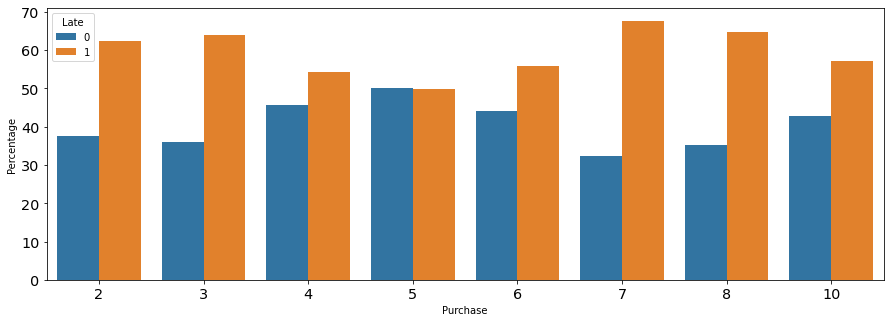

In [ ]:
# Discount Late Frequency
plt.figure(figsize=(15, 5))
sns.barplot(x = 'Purchase', y = 'Percentage', data = df_purchase , hue = 'Late')

- tidak ada kolom yang menarik untuk kategorikal.
- analisis lebih lanjut menggunakan bar plot/hist plot  dan percentage masing-masing data akan coba dilanjutkan di business insight analysis.

# Business Insights

## Discount Offered dengan Variabel Target (Late Shipment)

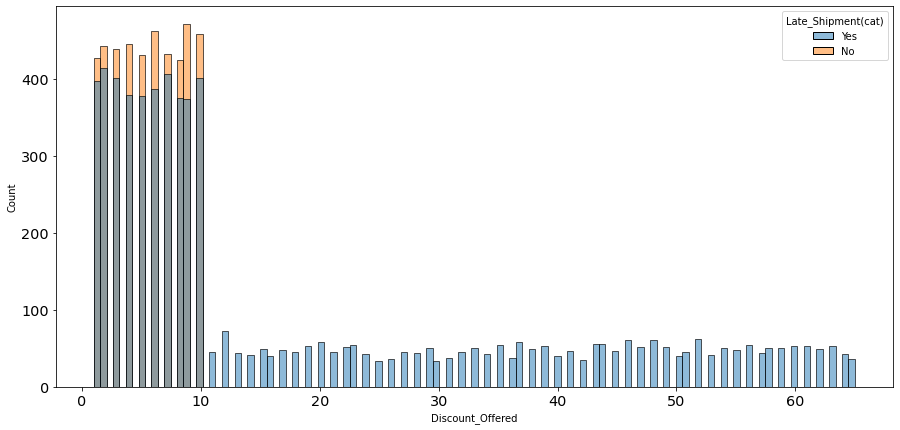

In [ ]:
#Pola persebaran transaksi berdasarkan besaran diskon dan pengiriman telat/tidak
plt.figure(figsize=(15,7))
sns.histplot(data=df_shipping, x='Discount_Offered', hue='Late_Shipment(cat)')

- Diskon >10% kecenderungannya pengiriman telat.

In [ ]:
#Pengelompokkan rata-rata Discount Offered pada pengiriman barang telat dan tidak
df_shipping.groupby('Late_Shipment(cat)').agg({'Discount_Offered' : [ 'mean']})

,Discount_Offered
,mean
Late_Shipment(cat),
No,5.545987
Yes,18.663721


- Secara rata-rata, Discount Offered pada transaksi yang pengiriman barangnya telat lebih tinggi.

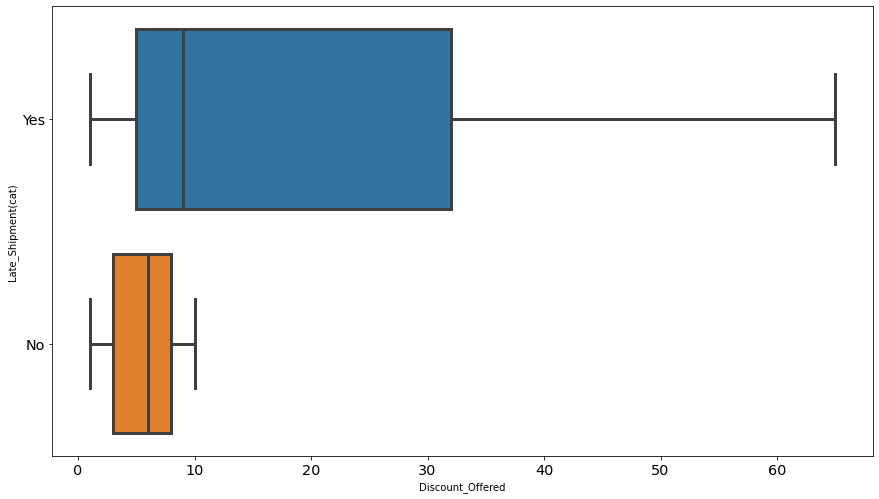

In [ ]:
#Pembuatan grafik menggunakan seaborn
sns.boxplot(x = 'Discount_Offered', 
            y = 'Late_Shipment(cat)', 
            data = df_shipping)

- Dari boxplot diatas, kita dapat melihat distribusi data Discount Offered pada pengiriman barang telat lebih besar dibandingkan dengan yang tepat waktu. Nilai q1, q2, q3 kelompok telat lebih besar juga lebih besar.

Transaksi pembelian yang memiliki diskon 10% atau kurang, kecenderungannya adalah barang yang dikirim tepat waktu lebih banyak daripada yang pengirimannya terlambat. Keadaan justru berbalik ketika transaksi memiliki diskon lebih dari 10%, barang justru cenderung terlambat pengirimannya. Hal ini bisa disebabkan karena semakin besar diskon harga mengakibatkan semakin besar pula minat customer untuk berbelanja (contoh: promo diskon hari raya atau promo harbolnas), alhasil muatan barang digudang dan ekspedisi menjadi overloaded dan pengiriman barang menjadi telat. Patut diperhatikan pula gudang penyimpanan barang, tenaga kerja, dan moda pengiriman barang tertentu pastinya mempunyai kapasitas dalam pengiriman barang, ketika pengiriman barang overloaded kemungkinan pengiriman barang bisa terlambat.
> Solusi : Lebih ke masalah teknis operasional pengiriman, diskon yang besar menyebabkan transaksi pembelian overloaded dan berpotensi menyebabkan barang terlambat. Harus dicari tahu teknis operasional (moda pengiriman dan lokasi gudang) apa yang paling berpotensi besar terjadinya pengiriman yang terlambat. 

## Rasio Perbandingan Pengiriman Barang Telat/Tidak di Setiap Variabel Kategorik yang Berkaitan dengan Teknis Operasional

### Rasio Pengiriman Telat/Tidak berdasarkan Lokasi Gudang

In [ ]:
#Data aggregation 1
df_shipping_warehouse1 = df_shipping.groupby(['Warehouse_Block', 'Late_Shipment(cat)']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping_warehouse1

,Warehouse_Block,Late_Shipment(cat),Jumlah Shipping
0,A,No,758
1,A,Yes,1075
2,B,No,729
3,B,Yes,1104
4,C,No,739
5,C,Yes,1094
6,D,No,738
7,D,Yes,1096
8,F,No,1472
9,F,Yes,2194


In [ ]:
#Data aggregation 2
df_shipping_warehouse2 = df_shipping.groupby(['Warehouse_Block']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping_warehouse2

,Warehouse_Block,Jumlah Shipping
0,A,1833
1,B,1833
2,C,1833
3,D,1834
4,F,3666


In [ ]:
#Merge
df_shipping_warehouse = df_shipping_warehouse1.merge(df_shipping_warehouse2,
                              left_on = ['Warehouse_Block'],
                              right_on = ['Warehouse_Block'],
                              how = 'inner'
                              )
df_shipping_warehouse

,Warehouse_Block,Late_Shipment(cat),Jumlah Shipping_x,Jumlah Shipping_y
0,A,No,758,1833
1,A,Yes,1075,1833
2,B,No,729,1833
3,B,Yes,1104,1833
4,C,No,739,1833
5,C,Yes,1094,1833
6,D,No,738,1834
7,D,Yes,1096,1834
8,F,No,1472,3666
9,F,Yes,2194,3666


In [ ]:
#Buat kolom rasio
df_shipping_warehouse['Ratio'] = np.round(df_shipping_warehouse['Jumlah Shipping_x']*100 / df_shipping_warehouse['Jumlah Shipping_y'], 3)
df_shipping_warehouse

,Warehouse_Block,Late_Shipment(cat),Jumlah Shipping_x,Jumlah Shipping_y,Ratio
0,A,No,758,1833,41.353
1,A,Yes,1075,1833,58.647
2,B,No,729,1833,39.771
3,B,Yes,1104,1833,60.229
4,C,No,739,1833,40.316
5,C,Yes,1094,1833,59.684
6,D,No,738,1834,40.240
7,D,Yes,1096,1834,59.760
8,F,No,1472,3666,40.153
9,F,Yes,2194,3666,59.847


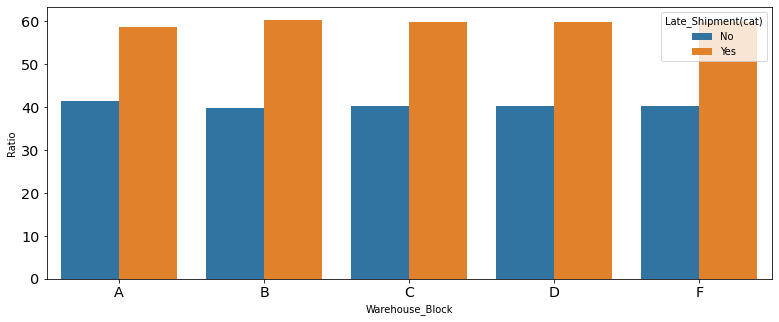

In [ ]:
#Barchart perbandingan rasio peluang terjadinya keterlambatan di setiap gudang
x = df_shipping_warehouse['Warehouse_Block']
y = df_shipping_warehouse['Ratio']
plt.figure(figsize=(13,5))
sns.barplot(x='Warehouse_Block', y='Ratio', hue='Late_Shipment(cat)', data=df_shipping_warehouse)
plt.show()

- Secara rasio, semua gudang relatif berimbang rasio peluang untuk terjadinya keterlambatan pengiriman. Semua gudang sama-sama lebih berpeluang untuk terjadi keterlambatan pengiriman.

### Mencari gudang mana yang lebih sering mengalami keterlambatan dengan nilai diskon yang lebih dari 10%

In [ ]:
#Mengetahui nilai-niali diskon
pd.unique(df_shipping['Discount_Offered'])

array([44, 59, 48, 10, 46, 12,  3, 11, 29, 32,  1, 43, 45,  6, 36, 18, 38,
       51,  2, 28, 24, 31, 61, 22,  4, 62, 16, 56, 15,  9, 40, 37, 41, 17,
       64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57,  7, 35,  8,  5, 53, 55,
       47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30])

In [ ]:
#Filter data frame khusus untuk transaksi dengan diskon diatas 10%
df_shipping10disc = df_shipping[df_shipping['Discount_Offered'] > 10]
df_shipping10disc

,ID,Warehouse_Block,Mode_of_Shipment,Customer_Care_Calls,Customer_Rating(num),Cost_of_The_Product,Prior_Purchases,Product_Importance,Gender,Discount_Offered,Weight_in_gms,Late_Shipment(num),Customer_Rating(cat),Late_Shipment(cat)
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Bintang 2,Yes
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Bintang 5,Yes
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,Bintang 2,Yes
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,Bintang 2,Yes
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1,Bintang 1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,3130,B,Road,3,4,248,2,medium,F,15,2983,1,Bintang 4,Yes
3130,3131,C,Road,6,5,246,4,medium,M,50,3618,1,Bintang 5,Yes
3131,3132,F,Road,4,1,232,3,medium,M,55,2686,1,Bintang 1,Yes
3132,3133,D,Road,3,5,251,3,low,F,21,2476,1,Bintang 5,Yes


In [ ]:
#Mengetahui value yang ada pada variabel 'Late_Shipment(cat)'
df_shipping10disc['Late_Shipment(cat)'].value_counts()

Yes    2647
Name: Late_Shipment(cat), dtype: int64

Data transaksi dengan nilai diskon diatas 10% semuanya mengalami keterlambatan, tidak peduli dikirim dari gudang apa.

In [ ]:
#Aggregasi jumlah berdasarkan telat/tidak
df_shipping10discagg1 = df_shipping10disc.groupby(['Warehouse_Block', 'Late_Shipment(cat)']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping10discagg1

,Warehouse_Block,Late_Shipment(cat),Jumlah Shipping
0,A,Yes,433
1,B,Yes,439
2,C,Yes,445
3,D,Yes,438
4,F,Yes,892


Pengiriman barang paling banyak terjadi dari gudang F

In [ ]:
#Aggregasi jumlah berdasarkan gudang
df_shipping10discagg2 = df_shipping10disc.groupby(['Warehouse_Block']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping10discagg2

,Warehouse_Block,Jumlah Shipping
0,A,433
1,B,439
2,C,445
3,D,438
4,F,892


In [ ]:
#Merge
df_shipping10discagg = df_shipping10discagg1.merge(df_shipping10discagg2,
                              left_on = ['Warehouse_Block'],
                              right_on = ['Warehouse_Block'],
                              how = 'inner'
                              )
df_shipping10discagg

,Warehouse_Block,Late_Shipment(cat),Jumlah Shipping_x,Jumlah Shipping_y
0,A,Yes,433,433
1,B,Yes,439,439
2,C,Yes,445,445
3,D,Yes,438,438
4,F,Yes,892,892


In [ ]:
#Pembentukan rasio
df_shipping10discagg['Ratio'] = np.round(df_shipping10discagg['Jumlah Shipping_x']*100 / df_shipping10discagg['Jumlah Shipping_y'].sum(), 3)
df_shipping10discagg

,Warehouse_Block,Late_Shipment(cat),Jumlah Shipping_x,Jumlah Shipping_y,Ratio
0,A,Yes,433,433,16.358
1,B,Yes,439,439,16.585
2,C,Yes,445,445,16.811
3,D,Yes,438,438,16.547
4,F,Yes,892,892,33.699


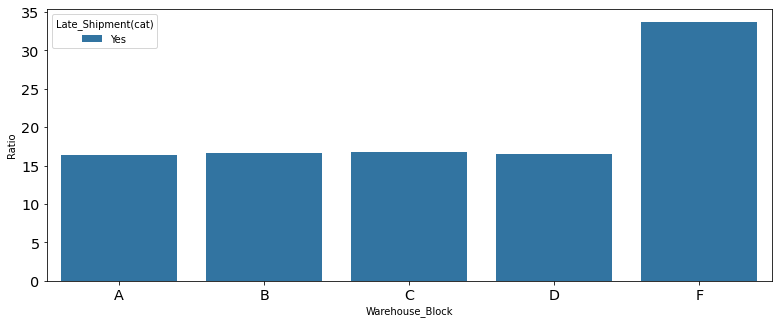

In [ ]:
#Grafik rasio barchart
x = df_shipping10discagg['Warehouse_Block']
y = df_shipping10discagg['Ratio']
plt.figure(figsize=(13,5))
sns.barplot(x='Warehouse_Block', y='Ratio', hue='Late_Shipment(cat)', data=df_shipping10discagg)
plt.show()

Menarik, data transaksi dengan nilai diskon diatas 10% semuanya mengalami keterlambatan, tidak peduli dikirim dari gudang apa. Pengiriman paling banyak terjadi dari gudang F, hal itu wajar karena secara sampling data, gudang f memang paling banyak jumlahnya. Perlu diselidiki lebih lanjut, jumlah sampel tiap gudang harus kita samakan terlebih dahulu, kita lakukan random sampling dan cari tahu, barang transaksi dengan diskon>10% paling banyak dikirim dari gudang apa?


### Rasio Pengiriman Telat/Tidak berdasarkan Moda Pengiriman

In [ ]:
#Data aggregation 1
df_shipping_mode1 = df_shipping.groupby(['Mode_of_Shipment', 'Late_Shipment(cat)']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping_mode1

,Mode_of_Shipment,Late_Shipment(cat),Jumlah Shipping
0,Flight,No,708
1,Flight,Yes,1069
2,Road,No,725
3,Road,Yes,1035
4,Ship,No,3003
5,Ship,Yes,4459


In [ ]:
#Data aggregation 2
df_shipping_mode2 = df_shipping.groupby(['Mode_of_Shipment']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping_mode2

,Mode_of_Shipment,Jumlah Shipping
0,Flight,1777
1,Road,1760
2,Ship,7462


In [ ]:
#Merge
df_shipping_mode = df_shipping_mode1.merge(df_shipping_mode2,
                              left_on = ['Mode_of_Shipment'],
                              right_on = ['Mode_of_Shipment'],
                              how = 'inner'
                              )
df_shipping_mode

,Mode_of_Shipment,Late_Shipment(cat),Jumlah Shipping_x,Jumlah Shipping_y
0,Flight,No,708,1777
1,Flight,Yes,1069,1777
2,Road,No,725,1760
3,Road,Yes,1035,1760
4,Ship,No,3003,7462
5,Ship,Yes,4459,7462


In [ ]:
#Buat kolom rasio
df_shipping_mode['Ratio'] = round(df_shipping_mode['Jumlah Shipping_x'] / df_shipping_mode['Jumlah Shipping_y'], 2)
df_shipping_mode

,Mode_of_Shipment,Late_Shipment(cat),Jumlah Shipping_x,Jumlah Shipping_y,Ratio
0,Flight,No,708,1777,0.40
1,Flight,Yes,1069,1777,0.60
2,Road,No,725,1760,0.41
3,Road,Yes,1035,1760,0.59
4,Ship,No,3003,7462,0.40
5,Ship,Yes,4459,7462,0.60


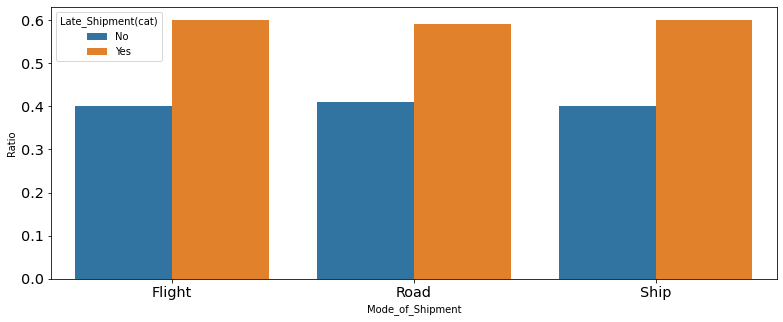

In [ ]:
x = df_shipping_mode['Mode_of_Shipment']
y = df_shipping_mode['Ratio']
plt.figure(figsize=(13,5))
sns.barplot(x='Mode_of_Shipment', y='Ratio', hue='Late_Shipment(cat)', data=df_shipping_mode)
plt.show()

- Secara rasio, semua moda relatif berimbang rasio peluang untuk terjadinya keterlambatan pengiriman. Semua moda pengiriman sama-sama lebih berpeluang untuk terjadi keterlambatan pengiriman.

### Mencari moda pengiriman mana yang lebih sering mengalami keterlambatan dengan nilai diskon yang lebih dari 10%

In [ ]:
#Aggregasi jumlah berdasarkan telat/tidak
df_shipping10discagg3 = df_shipping10disc.groupby(['Mode_of_Shipment', 'Late_Shipment(cat)']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping10discagg3

,Mode_of_Shipment,Late_Shipment(cat),Jumlah Shipping
0,Flight,Yes,433
1,Road,Yes,406
2,Ship,Yes,1808


Semua transaksi pembelian dengan diskon diatas 10% mengalami keterlambatan.

In [ ]:
#Rasio
df_shipping10discagg3['Ratio'] = np.round(df_shipping10discagg3['Jumlah Shipping']*100 / df_shipping10discagg3['Jumlah Shipping'].sum(), 3)
df_shipping10discagg3

,Mode_of_Shipment,Late_Shipment(cat),Jumlah Shipping,Ratio
0,Flight,Yes,433,16.358
1,Road,Yes,406,15.338
2,Ship,Yes,1808,68.304


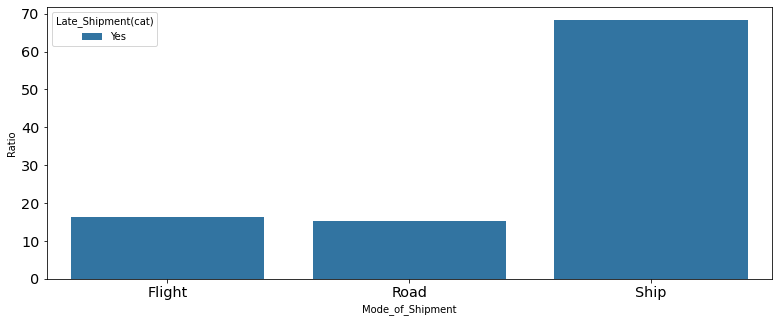

In [ ]:
#Grafik rasio barchart
x = df_shipping10discagg3['Mode_of_Shipment']
y = df_shipping10discagg3['Ratio']
plt.figure(figsize=(13,5))
sns.barplot(x='Mode_of_Shipment', y='Ratio', hue='Late_Shipment(cat)', data=df_shipping10discagg3)
plt.show()

Data transaksi dengan nilai diskon diatas 10% semuanya mengalami keterlambatan, tidak peduli dikirim dengan moda transportasi apa. Pengiriman paling banyak terjadi dengan moda kapal, hal itu wajar karena secara sampling data, moda kapal memang paling banyak jumlahnya. Perlu diselidiki lebih lanjut, jumlah sampel tiap moda transportasi harus kita samakan terlebih dahulu, kita lakukan random sampling dan cari tahu, barang transaksi dengan diskon>10% paling banyak dikirim melalui moda transportasi apa?

## Berat Paket Vs Target Variabel

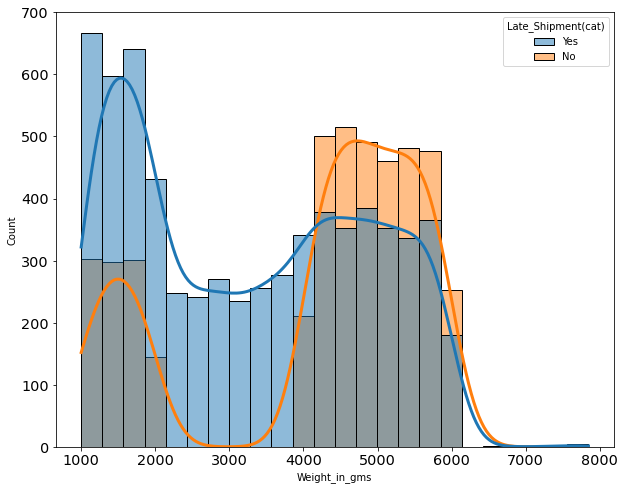

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df_shipping, x='Weight_in_gms', hue='Late_Shipment(cat)', kde=True)

- Pengiriman barang dengan berat < 4000 gram cenderung telat, perlu digali lebih lanjut data pengiriman barang dengan berat <4000 gram dan 2000-4000 gram.

## Hubungan Keterlambatan Pengiriman Barang dengan Pelayanan Customer

### Late Shipment vs Customer Care Calls

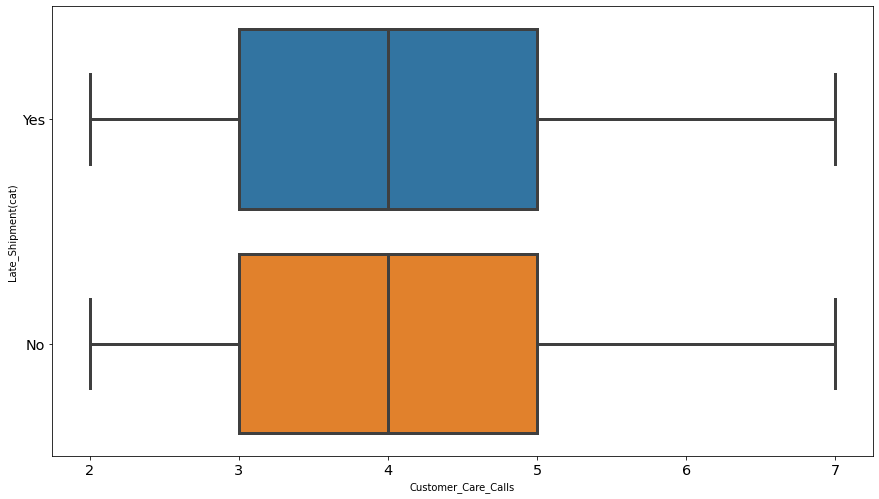

In [ ]:
#Pembuatan grafik menggunakan seaborn
sns.boxplot(x = 'Customer_Care_Calls', 
            y = 'Late_Shipment(cat)', 
            data = df_shipping)

### Late Shipment vs Customer Rating

In [ ]:
df_shipping_rat = df_shipping.groupby(['Late_Shipment(cat)', 'Customer_Rating(cat)']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah pelanggan'})
df_shipping_rat

,Late_Shipment(cat),Customer_Rating(cat),Jumlah pelanggan
0,No,Bintang 1,922
1,No,Bintang 2,892
2,No,Bintang 3,882
3,No,Bintang 4,886
4,No,Bintang 5,854
5,Yes,Bintang 1,1313
6,Yes,Bintang 2,1273
7,Yes,Bintang 3,1357
8,Yes,Bintang 4,1303
9,Yes,Bintang 5,1317


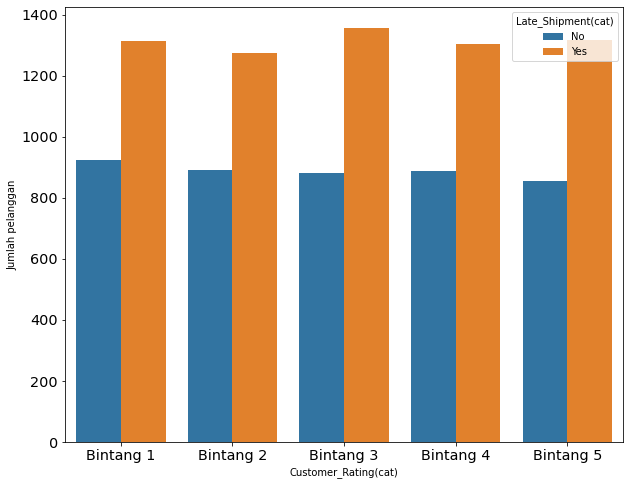

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Customer_Rating(cat)', y='Jumlah pelanggan', data=df_shipping_rat, hue='Late_Shipment(cat)')

- Keterlambatan tidak mempengaruhi rating

## MULTIVARIATE ? BUSINESS INSIGHT 2 (TAMBAHAN)

Hubungan feature categorical dengan waktu kedatangan

In [ ]:
# membuat list kolom categorical

object_columns = df_shipping.select_dtypes(include = ['object'])
object_columns.head()

,Warehouse_Block,Mode_of_Shipment,Product_Importance,Gender,Customer_Rating(cat),Late_Shipment(cat)
0,D,Flight,low,F,Bintang 2,Yes
1,F,Flight,low,M,Bintang 5,Yes
2,A,Flight,low,M,Bintang 2,Yes
3,B,Flight,medium,M,Bintang 3,Yes
4,C,Flight,medium,F,Bintang 2,Yes


1. Warehouse Block

In [ ]:
# Melihat distribusi Warehouse Block
warehouse = object_columns['Warehouse_Block'].value_counts().reset_index()
warehouse.columns = ['warehouse', 'value_counts']
fig = px.pie(warehouse, names = 'warehouse', values = 'value_counts', 
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


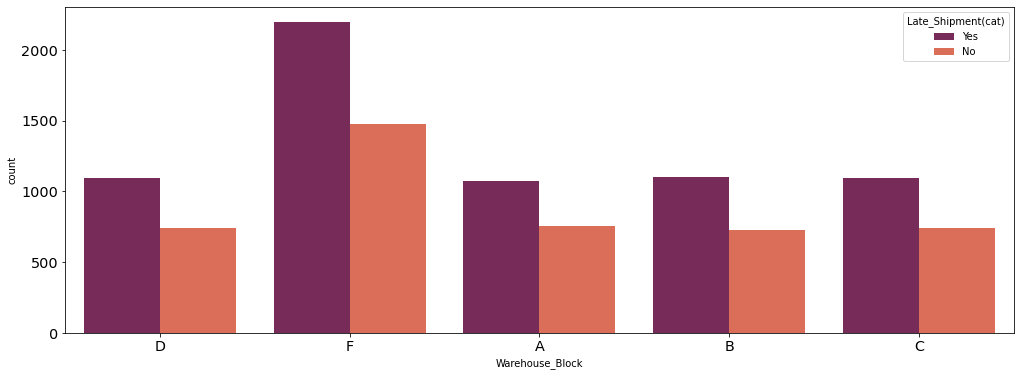

In [ ]:
# melihat gudang mana yang berpotensi untuk terlambat
plt.figure(figsize = (17, 6))
sns.countplot('Warehouse_Block', hue = 'Late_Shipment(cat)', data = df_shipping, palette='rocket')
plt.show()

Pada semua gudang mengalami keterlambatan, tetapi pada gudang F lebih banyak yang terlambat

2. Gender

In [ ]:
# Melihat distribusi Gender

gender = object_columns['Gender'].value_counts().reset_index()
gender.columns = ['Gender', 'value_counts']
fig = px.pie(gender, names = 'Gender', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


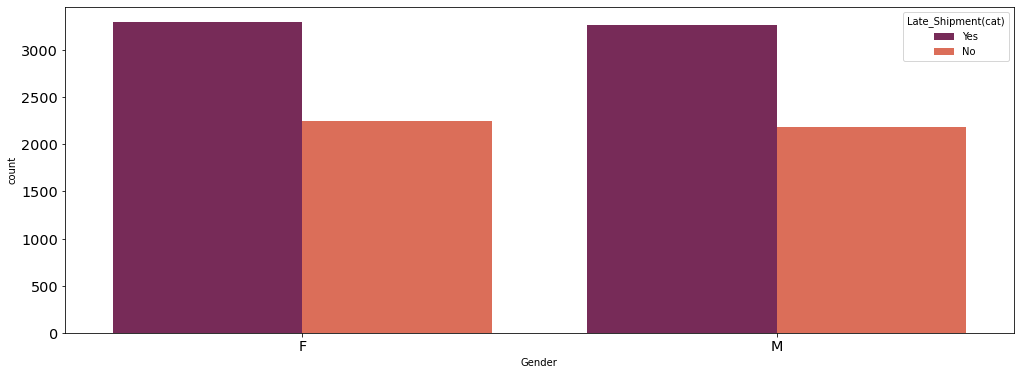

In [ ]:
# Apakah Gender mempengaruhi keterlambatan
plt.figure(figsize = (17, 6))
sns.countplot('Gender', hue = 'Late_Shipment(cat)', data = df_shipping, palette='rocket')
plt.show()

Keterlambatan tidak dipengaruhi oleh gender

3. Product Importance

In [ ]:
# Melihat distribusi Product Importance

product_imp = object_columns['Product_Importance'].value_counts().reset_index()
product_imp.columns = ['Product_Importance', 'value_counts']
fig = px.pie(product_imp, names = 'Product_Importance', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.Darkmint_r, width = 650, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



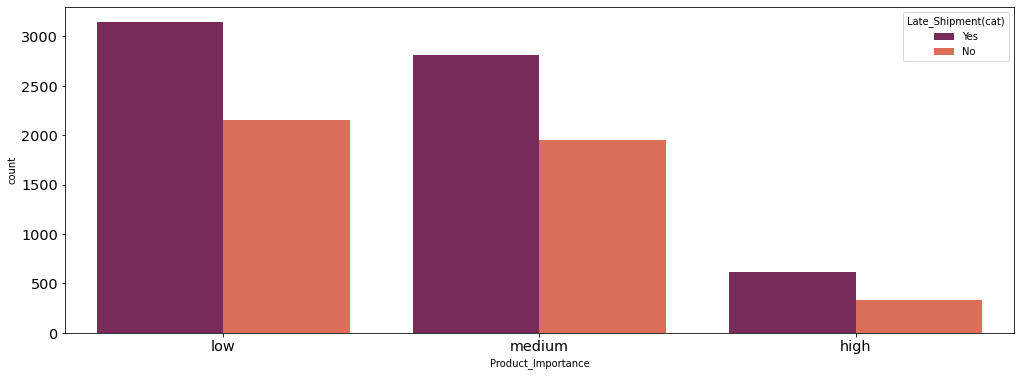

In [ ]:
# Apakah product importance mempengaruhi keterlambatan

plt.figure(figsize = (17, 6))
sns.countplot('Product_Importance', hue = 'Late_Shipment(cat)', data = df_shipping, palette='rocket')
plt.show()

Product Importance juga tidak mempengaruhi keterlambatan. Pada setiap kategori memiliki jumlah keterlambatan yang lebih banyak daripada yang tepat waktu.

4. Prior Purchasing

In [ ]:
# Melihat distribusi kolom prior purchases

prior_purchases = df_shipping['Prior_Purchases'].value_counts().reset_index()
prior_purchases.columns = ['Prior_Purchases', 'value_counts']
fig = px.pie(prior_purchases, names = 'Prior_Purchases', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



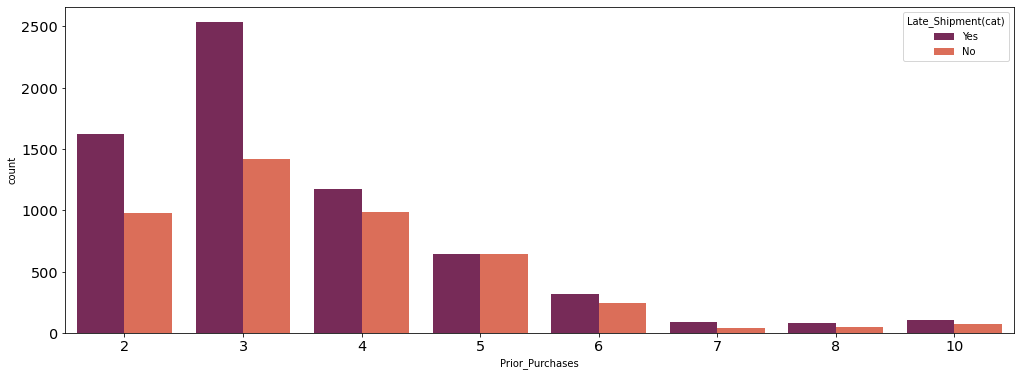

In [ ]:
# Apakah kolom prior purchases mempengaruhi keterlambatan

plt.figure(figsize = (17, 6))
sns.countplot('Prior_Purchases', hue = 'Late_Shipment(cat)', data = df_shipping, palette='rocket')
plt.show()

Pada semua kolom prior purchase mengelami keterlambatan, kecuali prior purchase yang bernilai 5. Paling banyak terlambat di kolom bernilai 2 dan 3.

5. Hubungan antara Gender, Prior Purchase dan Keterlambatan

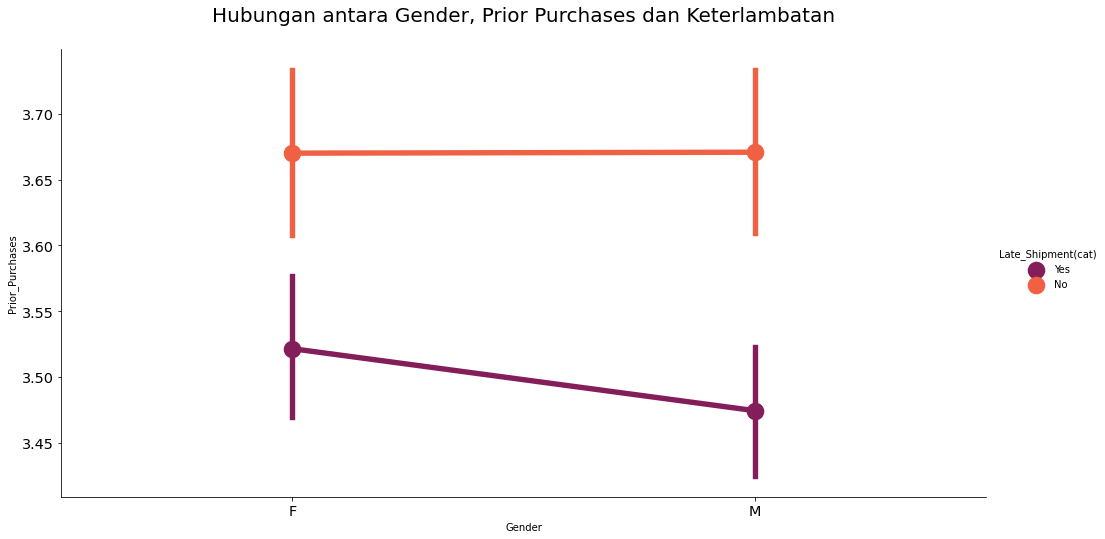

In [ ]:
# Membuat line plot untuk melihat hubungan antara Gender, Prior Purchases dan Keterlambatan

sns.catplot(x = 'Gender', y = 'Prior_Purchases', hue = 'Late_Shipment(cat)', data = df_shipping, kind = 'point', height = 7, aspect = 2,
            palette = 'rocket')
plt.title('Hubungan antara Gender, Prior Purchases dan Keterlambatan\n', fontsize = 20)
plt.show()

Dari gambar diatas disimpulkan bahwa tingkat keterlambatan pada wanita lebih tinggi dengan nilai prior purchase lebih tinggi

6. Hubungan antara Diskon, Prior Purchase dan Keterlambatan

In [ ]:
# membuat boxplot antara diskon, prior purchases dan keterlambatan

px.box(x = 'Prior_Purchases', y = 'Discount_Offered', data_frame = df_shipping, color = 'Late_Shipment(cat)', template = 'plotly_dark')